In [3]:
import load_data

ds = load_data.LabeledDataset(root_dir=load_data.TRAINING_DATA_ROOT)



AttributeError: 'tuple' object has no attribute 'shape'

In [5]:
el = ds[0]

for e in el:
    print(e.shape)

torch.Size([3, 313, 500])
torch.Size([2, 4])
torch.Size([2])


In [6]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

# https://pytorch.org/vision/stable/auto_examples/plot_repurposing_annotations.html#sphx-glr-auto-examples-plot-repurposing-annotations-py
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        
        

In [23]:
import torchvision

import importlib

index_to_class = load_data.load_inverted_class_index()

def show_with_bboxes(element):
    img, bboxes, class_idxs = element
    classes = [
        index_to_class[class_idx.item()] 
        for class_idx in class_idxs
    ]
    annotated = torchvision.utils.draw_bounding_boxes(img, bboxes, classes, colors='red')
    show(annotated)



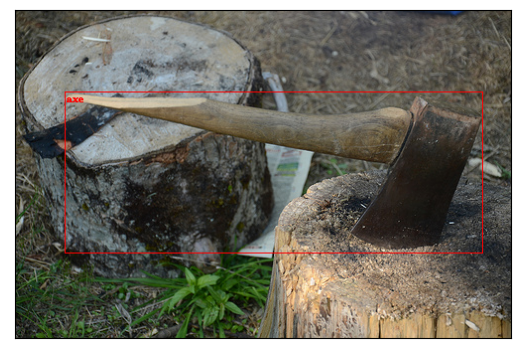

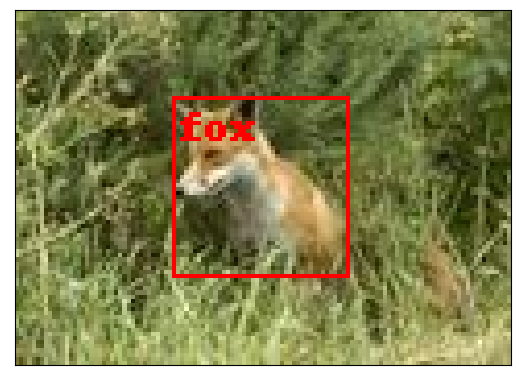

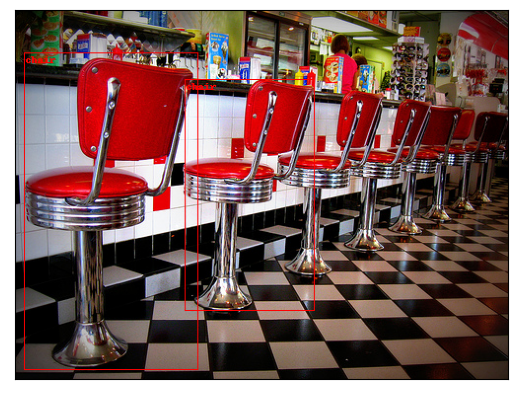

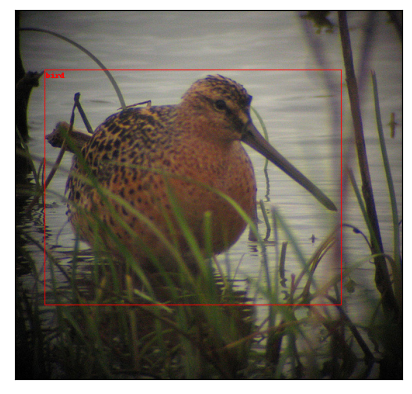

In [26]:
import random

for i, el in zip(range(4), ds):
    idx = random.randint(0, len(ds))
    show_with_bboxes(ds[idx])

In [27]:
index_to_class = load_data.load_inverted_class_index()

print(max(index_to_class))

99


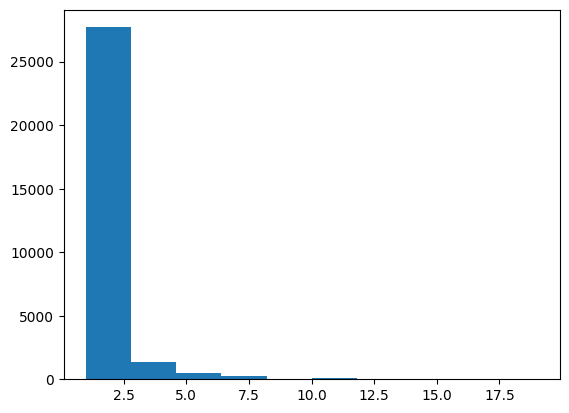

In [31]:
from matplotlib import pyplot

import load_data

ds = load_data.LabeledDataset(root_dir=load_data.TRAINING_DATA_ROOT)

num_items = []

for image, bbox, classes in ds:
    num_items.append(classes.shape[0])
    

pyplot.hist(num_items)
pyplot.show()

In [34]:
import pandas as pd

df = pd.DataFrame(num_items)

print(df.describe())

                  0
count  30000.000000
mean       1.376433
std        1.192887
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       19.000000


torch.Size([3, 186, 210])
(210, 186)


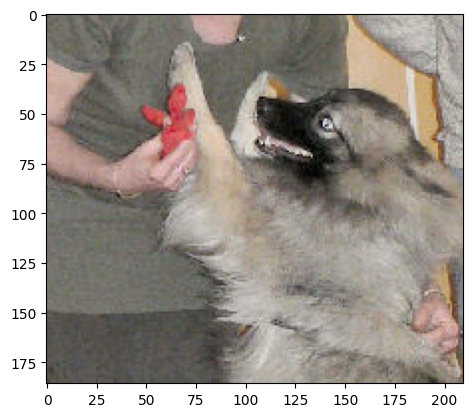

In [44]:
img = torchvision.io.read_image('data/labeled_data/training/images/3031.JPEG')
print(img.shape)
img = F.to_pil_image(img)
print(img.size)
plt.imshow(img)


torch.Size([3, 561, 512])


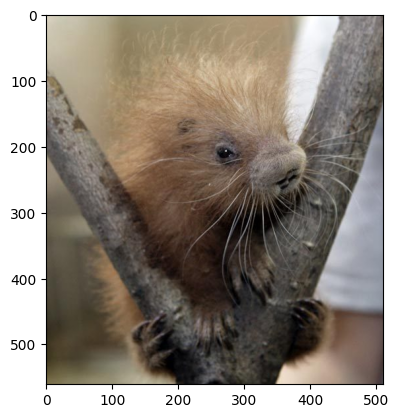

In [50]:
img = torchvision.io.read_image('data/labeled_data/training/images/3029.JPEG')
print(img.shape)
img = F.to_pil_image(img)
plt.imshow(img)


{'id': 3030, 'width': 210, 'height': 186, 'file_name': '3031.JPEG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': '2013-11-14 17:02:52'}


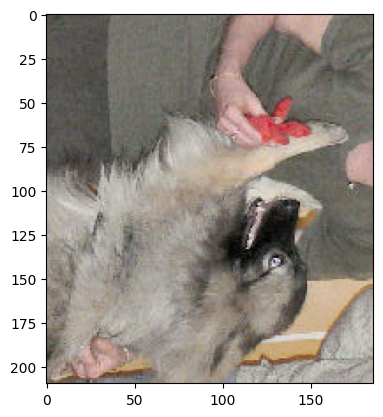

In [49]:
import detectron2.data.detection_utils as utils
import json

train_annotations = json.loads(open('data/annotations/annotations_training.json', 'r').read())
el = train_annotations['images'][3030]
print(el)
img = utils.read_image('data/labeled_data/training/images/' + el['file_name'])
plt.imshow(img)                       



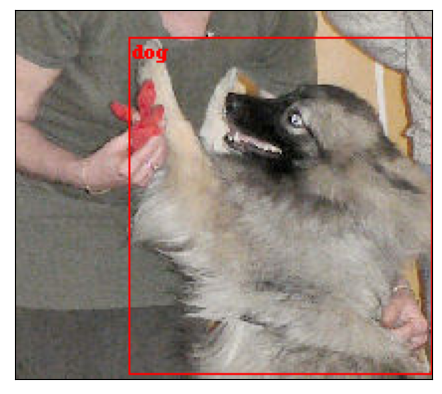

In [51]:
show_with_bboxes(ds[3030])

In [53]:
element = ds[3030]
img, bboxes, class_idxs = element
img = img.transpose(0, 1)
classes = [
    index_to_class[class_idx.item()] 
    for class_idx in class_idxs
]
annotated = torchvision.utils.draw_bounding_boxes(img, bboxes, classes, colors='red')
show(annotated)

ValueError: Only grayscale and RGB images are supported